In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['wisconsin_breast_cancer.csv']


Alex Towers 1105233.

Load in the data.

In [2]:
df = pd.read_csv("../input/wisconsin_breast_cancer.csv")
df.fillna(0, inplace=True)
df.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
x=df.iloc[:, 1:10]
y=df.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1105233)
print(x_train.shape, y_train.shape)


(559, 9) (559, 1)


Create an instance of the SGDClassfier

In [5]:
#import SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1105233)

In [6]:
#import cross validator
from sklearn.model_selection import cross_val_score

In [7]:
def decode (int, object):
    subcols = list()
    if (subset & 1 == 1):
        subcols.append(x_train.columns[0])
    if (subset & 2 == 2):
        subcols.append(x_train.columns[1])
    if (subset & 4 == 4):
        subcols.append(x_train.columns[2])
    if (subset & 8 == 8):
        subcols.append(x_train.columns[3])
    if (subset & 16 == 16):
        subcols.append(x_train.columns[4])
    if (subset & 32 == 32):
        subcols.append(x_train.columns[5])
    if (subset & 64 == 64):
        subcols.append(x_train.columns[6])
    if (subset & 128 == 128):
        subcols.append(x_train.columns[7])
    if (subset & 256 == 256):
        subcols.append(x_train.columns[8])    
    return subcols;    

In [8]:
all_cv_scores = list()
all_cols = list()

for subset in range (1, 512):
    cols = decode(subset, x_train.columns)   
    cv_score = cross_val_score(sgd_clf, x_train[cols], y_train, cv=10, scoring = "accuracy")    
    all_cv_scores.append(cv_score.mean())
    all_cols.append(cols)

In [9]:
max_accuracy = (max(all_cv_scores))
max_index = all_cv_scores.index(max_accuracy)
print(max(all_cv_scores))
print(all_cv_scores.index(max_accuracy))
print(all_cols[max_index])


0.9517116655274549
301
['size', 'shape', 'adhesion', 'nuclei', 'mitosis']


In [10]:
from sklearn.metrics import accuracy_score
all_test_scores = list()
sgd_clf_test = SGDClassifier(random_state=1105233)
for i in range (len(all_cols)):
    sgd_clf_test.fit(x_train[all_cols[i]], y_train)
    pred = sgd_clf_test.predict(x_test[all_cols[i]])
    accuracy = accuracy_score(y_test, pred)
    all_test_scores.append(accuracy)

In [11]:
print(all_test_scores[301])
print(max(all_test_scores))

0.9571428571428572
0.9928571428571429


The subset that looks the best from the cv scores is subset at index number 301 "['size', 'shape', 'adhesion', 'nuclei', 'mitosis']". This has scored 95% on the training data.
The accuracy of this subset on the test data was less though, at 90%. The max was much higher (99%).

Text(0, 0.5, 'Test Accuracy')

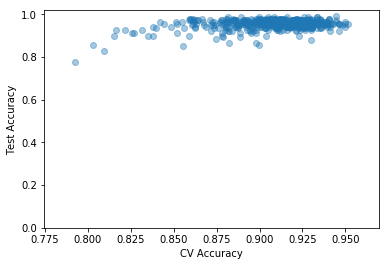

In [12]:
import matplotlib.pyplot as plt

plt.scatter(all_cv_scores, all_test_scores, alpha=0.4)
plt.ylim(ymin=0)
plt.xlabel("CV Accuracy")
plt.ylabel("Test Accuracy")

Repeat for random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=30, random_state=1105233)

In [14]:
all_rfcv_scores = list()

for i in range (len(all_cols)):     
    rf_score = cross_val_score(rf_clf, x_train[all_cols[i]], y_train, cv=10, scoring = "accuracy")    
    all_rfcv_scores.append(rf_score.mean())

In [15]:
print(max(all_rfcv_scores))
print(all_rfcv_scores.index(max(all_rfcv_scores)))

0.9713904078377762
110


In [16]:
all_rf_test_scores = list()
for i in range (len(all_cols)):
    rf_clf.fit(x_train[all_cols[i]], y_train)
    rf_pred = rf_clf.predict(x_test[all_cols[i]])
    rf_accuracy = accuracy_score(y_test, rf_pred)
    all_rf_test_scores.append(rf_accuracy)

In [17]:
print(all_rf_test_scores[110])
print(max(all_rf_test_scores))
print(all_rf_test_scores.index(max(all_rf_test_scores)))
print(all_cols[110])
print(all_cols[164])

0.9785714285714285
0.9928571428571429
164
['thickness', 'size', 'shape', 'adhesion', 'nuclei', 'chromatin']
['thickness', 'shape', 'nuclei', 'nucleoli']


The subset which looked the best in the cross validations for the random tree classifier was ['thickness', 'size', 'shape', 'adhesion', 'nuclei', 'chromatin'], it was 97.1% accurate and on the test data performed slightly better (97.8%). In the test set it did not return the most accurate result but was close.

Text(0, 0.5, 'Test Accuracy')

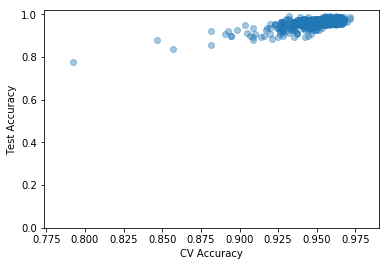

In [18]:
plt.scatter(all_rfcv_scores, all_rf_test_scores, alpha=0.4)
plt.ylim(ymin=0)
plt.xlabel("CV Accuracy")
plt.ylabel("Test Accuracy")

use GaussianNB classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
g_clf = GaussianNB()

In [20]:
all_gcv_scores = list()

for i in range (len(all_cols)):     
    g_score = cross_val_score(g_clf, x_train[all_cols[i]], y_train, cv=10, scoring = "accuracy")    
    all_gcv_scores.append(g_score.mean())

In [21]:
print(max(all_gcv_scores))
print(all_gcv_scores.index(max(all_gcv_scores)))

0.9677238550922761
34


In [22]:
all_g_test_scores = list()
for i in range (len(all_cols)):
    g_clf.fit(x_train[all_cols[i]], y_train)
    g_pred = g_clf.predict(x_test[all_cols[i]])
    g_accuracy = accuracy_score(y_test, g_pred)
    all_g_test_scores.append(g_accuracy)

In [23]:
print(all_g_test_scores[34])
print(max(all_g_test_scores))
print(all_g_test_scores.index(max(all_g_test_scores)))
print(all_cols[34])
print(all_cols[146])

0.9571428571428572
0.9785714285714285
22
['thickness', 'size', 'nuclei']
['thickness', 'size', 'single', 'nucleoli']


In the train set the highest accuracy subset got 96% accuracy. Itc scored slightly less in the test at 95% and was not the highest accuracy subset in the test data which got 97% accuracy.

Text(0, 0.5, 'Test Accuracy')

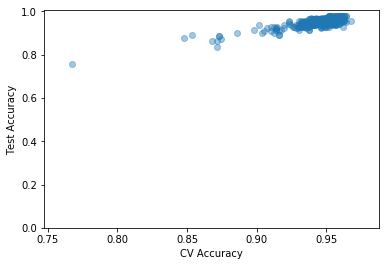

In [24]:
plt.scatter(all_gcv_scores, all_g_test_scores, alpha=0.4)
plt.ylim(ymin=0)
plt.xlabel("CV Accuracy")
plt.ylabel("Test Accuracy")

In [28]:
from sklearn.model_selection import cross_val_predict

sgd_clf_final = SGDClassifier(random_state=1105233)
rf_clf_final = RandomForestClassifier(n_estimators=30, random_state=1105233)
g_clf_final = GaussianNB()

sgd_pred = cross_val_predict(sgd_clf_final, x, y, cv=10, method='decision_function')
rf_pred = cross_val_predict(rf_clf_final, x, y, cv=10, method='predict_proba')
g_pred = cross_val_predict(g_clf_final, x, y, cv=10, method='predict_proba')

In [36]:
#method to plot roc curves
def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    plt.plot([0,1], [0,1], 'k--')

[1696.85225724 1695.85225724  634.62309722  626.21119959  622.36077636
  620.52999284  586.20748641  581.53429413  513.96672656  512.79421118
  460.04601706  459.70540809  259.75644177  230.45830384  223.87443448
  219.56518216  178.88041965  172.56561059  124.81669106  112.84067423
  107.90439341  103.07230836   98.07690509   83.25753164   42.6712453
  -18.79880027  -27.39398785  -28.60128129  -29.81003037  -37.05815794
  -39.81196643  -69.62444731  -70.88275325  -82.62264624  -85.03577365
  -85.03577365  -91.0641453   -91.34259403  -99.79954279 -120.30012299
 -121.23268485 -121.23268485 -121.61964622 -124.97640645 -124.97640645
 -148.38033536 -152.60334122 -170.8258273  -173.23895471 -176.73461535
 -177.18862423 -184.59961122 -189.26883684 -191.83899346 -192.69394538
 -197.90586031 -198.45276207 -212.93152654 -215.62965862 -215.99645934
 -219.62400703 -237.34780534 -237.58968729 -239.76093275 -240.07917706
 -240.09865264 -240.80652228 -243.75528116 -244.30218291 -245.31818242
 -247.0

Text(0, 0.5, 'TPR')

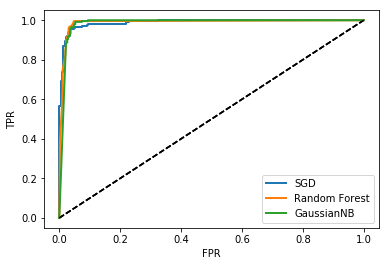

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, sgd_pred)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, rf_pred[:, 1])
fpr_gauss, tpr_gauss, thresholds_gauss = roc_curve(y, g_pred[:, 1])
print(thresholds)
print(thresholds_forest)
print(thresholds_gauss)


plot_roc_curve(fpr, tpr, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_gauss, tpr_gauss, "GaussianNB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")